<a href="https://colab.research.google.com/github/hy30n80/DeepLearning/blob/main/hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pwd

/content/drive/MyDrive/hw5


In [5]:
%cd /content/drive/MyDrive/hw5

/content/drive/MyDrive/hw5


In [6]:
!ls

hw5.ipynb  nn_layers_pt.py  __pycache__


In [7]:
import nn_layers_pt

Training data shape:  (60000, 1, 28, 28)
Training labels shape:  (60000,)
Test data shape:  (10000, 1, 28, 28)
Test labels shape:  (10000,)
loop count 50
loss 0.7633327266926291
loop count 100
loss 0.5332825752202577
loop count 150
loss 0.45025010245801667
loop count 200
loss 0.40459517800395095
training accuracy: 79.95000000000007 %
performing validation!
validation accuracy: 84 %
loop count 250
loss 0.3046245847187471
loop count 300
loss 0.32959722523812246
loop count 350
loss 0.3227479900968306
loop count 400
loss 0.3142443692632176
training accuracy: 90.46000000000001 %
performing validation!
validation accuracy: 95 %
loop count 450
loss 0.2767196871533415
loop count 500
loss 0.32195322642049695
loop count 50
loss 0.24200604201122886
loop count 100
loss 0.2941452891560379
loop count 150
loss 0.2403583438300419
loop count 200
loss 0.25667270184027485
training accuracy: 91.72000000000001 %
performing validation!
validation accuracy: 92 %
loop count 250
loss 0.31290606945680055
loop c

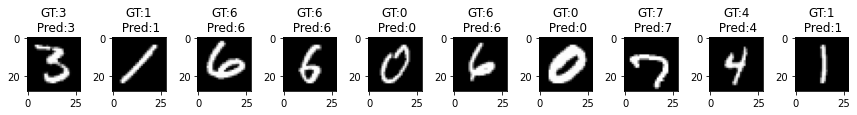

In [10]:
"""

HW5

"""
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import importlib
import pickle

import torch
import torch.nn as nn
import math

from keras.datasets import mnist

import nn_layers_pt as nnl
importlib.reload(nnl)



########################
#   Your custom classifier
#   based on prev. homeworks
########################

class nn_mnist_classifier:
    def __init__(self, mmt_friction=0.9, lr=1e-2):
        ## initialize each layer of the entire classifier

        # convolutional layer
        # input image size: 28 x 28
        # filter size: 3 x 3
        # input channel size: 1
        # output channel size (number of filters): 28

        self.conv_layer_1 = nnl.nn_convolutional_layer(f_height=3, f_width=3, input_size=28,
                                                       in_ch_size=1, out_ch_size=28)

        # activation: relu
        self.act_1 = nnl.nn_activation_layer()

        # activaition map output: map size 26 x 26, 28 channels

        # maxpool
        self.maxpool_layer_1 = nnl.nn_max_pooling_layer(pool_size=2, stride=2)

        # after max pool, map size 13 x 13, 28 channels

        # fully connected layer 1
        # input: 13 x 13 with 28 channels
        # output 128
        self.fc1 = nnl.nn_fc_layer(input_size=28*13*13, output_size=128)
        self.act_2 = nnl.nn_activation_layer()

        # fully connected layer 1
        # input 128
        # output 10
        self.fc2 = nnl.nn_fc_layer(input_size=128, output_size=10)

        # softmax
        self.sm1 = nnl.nn_softmax_layer()

        # cross entropy
        self.xent = nnl.nn_cross_entropy_layer()

        # initialize momentum parameter
        
        # learning rate
        self.lr = lr
        # friction parameter (alpha) for momentum update
        self.mmt_friction = mmt_friction

    # forward method
    # parameters:
    #   xx: input MNIST images in batch
    #   y: ground truth/labels of the batch
    
    def forward(self, xx, y):
        ########################
        # Q1. Complete forward method
        ########################
        # cv1_f, ac1_f, mp1_f, fc1_f, ac2_f, fc2_f, sm1_f, cn_f
        # are outputs from each layer of the CNN
        # cv1_f is the output from the convolutional layer
        # ac1_f is the output from 1st activation layer
        # mp1_f is the output from maxpooling layer
        # ... and so on


        cv1_f = self.conv_layer_1.forward(xx)
    
        # similarly, fill in ... part in the below
        ac1_f = self.act_1.forward(cv1_f)
 
        mp1_f = self.maxpool_layer_1.forward(ac1_f)

        fc1_f = self.fc1.forward(mp1_f)
   
        ac2_f = self.act_2.forward(fc1_f)
   

        fc2_f = self.fc2.forward(ac2_f)
   

        sm1_f = self.sm1.forward(fc2_f)


        cn_f = self.xent.forward(sm1_f, y)
     

        ########################
        # Q1 ends here
        ########################

        scores = sm1_f
        loss = cn_f

        return scores, loss
    
    def __call__(self, *args, **kwargs):
        return self.forward(*args, **kwargs)
    
    def step(self):

      self.conv_layer_1.step(self.lr, self.mmt_friction)
      self.fc1.step(self.lr, self.mmt_friction)
      self.fc2.step(self.lr, self.mmt_friction)

########################
#   Classifier based on PyTorch modules
########################

class MNISTClassifier_PT(nn.Module):
    def __init__(self):
        super().__init__()
        ## initialize each layer of the entire classifier

        ########################
        # Q2. Complete constructor using PyTorch modules
        ########################

        # convolutional layer
        # input image size: 28 x 28
        # filter size: 3 x 3
        # input channel size: 1
        # output channel size (number of filters): 28

        self.conv_layer_1 = nn.Conv2d(in_channels = 1, out_channels = 28, kernel_size = 3)
        
        # activation: relu
        self.act_1 = nn.ReLU()

        # activaition map output: map size 26 x 26, 28 channels

        # maxpool
        self.maxpool_layer_1 = nn.MaxPool2d(2,2)

        # after max pool, map size 13 x 13, 28 channels

        # fully connected layer 1
        # input: 13 x 13 with 28 channels
        # output 128
        self.fc1 = nn.Linear(4732, 128)
        self.act_2 = nn.ReLU()

        # fully connected layer 1
        # input 128
        # output 10
        self.fc2 = nn.Linear(128,10)
        ########################
        # Q2. ends here
        ########################

    # forward method
    # parameters:
    #   x: input MNIST images in batch
    def forward(self, x):
        ########################
        # Q3. Complete forward method
        ########################
        # cv1_f, ac1_f, mp1_f, fc1_f, ac2_f, fc2_f
        # are outputs from each layer of the CNN
        # cv1_f is the output from the convolutional layer
        # ac1_f is the output from 1st activation layer
        # mp1_f is the output from maxpooling layer
        # ... and so on

        cv1_f = self.conv_layer_1(x)
        ac1_f = self.act_1(cv1_f)
        mp1_f = self.maxpool_layer_1(ac1_f)
      
        # flatten for input to linear layer
        mp1_f = torch.flatten(mp1_f, start_dim = 1)
        
    
        fc1_f = self.fc1(mp1_f)
        ac2_f = self.act_2(fc1_f)
        
        out_logit = self.fc2(ac2_f)
        ########################
        # Q3 ends here
        ########################

        return out_logit


########################
## classification: dataset preparation
########################

if __name__ == '__main__':
  
    # set default type to float64
    torch.set_default_dtype(torch.float64)
    
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    X_train=np.expand_dims(X_train,axis=1)
    X_test=np.expand_dims(X_test,axis=1)

    # As a sanity check, we print out the size of the training and test data.
    print('Training data shape: ', X_train.shape)
    print('Training labels shape: ', y_train.shape)
    print('Test data shape: ', X_test.shape)
    print('Test labels shape: ', y_test.shape)

    # divide train into training and validation
    # set the dataset size
    # 50000 training and 10000 validation samples
    n_train_sample = 50000
    n_val_sample = len(y_train) - n_train_sample

    # data preprocessing
    # normalize pixel values to (0,1)
    X_train = X_train.astype('float64') / 255.0
    X_test = X_test.astype('float64') / 255.0
    
    # split data into training and validation dataset
    X_s = np.split(X_train, [n_val_sample, ])
    X_val = X_s[0]
    X_train = X_s[1]

    y_s = np.split(y_train, [n_val_sample, ])
    y_val = y_s[0]
    y_train = y_s[1]
    
    # create custom datasets: train, val, test
    trn_dataset=[]
    for d, l in zip(X_train, y_train):
        trn_dataset.append((d,l))
    
    val_dataset=[]
    for d, l in zip(X_val, y_val):
        val_dataset.append((d,l))
    
    test_dataset=[]
    for d, l in zip(X_test, y_test):
        test_dataset.append((d,l))

    ########################
    # Q. Set learning rate, batch size and total number of epochs for training
    # There are no definitive answers, experiement with several hyperparameters
    ########################
    lr = 0.01
    n_epoch = 2
    batch_size = 100

    val_batch = 100
    test_batch = 100

    # set friction (alpha) for momentum
    friction = 0.9
    
    ########################
    # Set this True for PyTorch module-based classifier
    # Set this False for your custom classifier
    PYTORCH_BUILTIN = False

    # define classifier
    if PYTORCH_BUILTIN:
        classifier = MNISTClassifier_PT()
        # loss function
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.SGD(classifier.parameters(), lr=lr, momentum=friction)
    else:
        classifier = nn_mnist_classifier(mmt_friction=friction, lr=lr)

    # number of steps per epoch
    numsteps = int(n_train_sample / batch_size)
    
    # dataloaders
    train_loader = torch.utils.data.DataLoader(
        trn_dataset, batch_size=batch_size, shuffle=True)
    
    val_loader = torch.utils.data.DataLoader(
        val_dataset, batch_size=val_batch, shuffle=True)

    test_loader = torch.utils.data.DataLoader(
        test_dataset, batch_size=test_batch, shuffle=True)

    do_validation = True

    ########################
    # training
    ########################

    for i in range(n_epoch):
        
        j = 0
        trn_accy = 0
        
        for trn_data in train_loader:
            X, y = trn_data
            
            X = torch.as_tensor(X)
            y = torch.as_tensor(y).long()
            
            if PYTORCH_BUILTIN:
                # perform forward, backprop and weight update
                scores = classifier(X)
                loss = criterion(scores, y)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
            
            else:
                # perform forward, backprop and weight update
                scores, loss = classifier.forward(X, y)

                loss.backward()
                classifier.step()
            

            # for tracking training accuracy
            estim = torch.ravel(torch.argmax(scores, axis=1))
            trn_accy += torch.sum((estim == y).long()).item() / batch_size
            
            j+=1

            # every 50 loops, check loss
            if (j + 1) % 50 == 0:
                print('loop count', j + 1)
                print('loss', loss.item())

                # every 200 loops, print training accuracy
                if (j + 1) % 200 == 0:
                    print('training accuracy:', trn_accy / 200 * 100, '%')
                    trn_accy = 0

                    # evaluate the validation accuarcy
                    if do_validation:
                        # pick 100 random samples from validation set
                        print('performing validation!')
                        X,y = next(iter(val_loader)) 

                        X = torch.as_tensor(X)
                        y = torch.as_tensor(y).long()
                        
                        with torch.no_grad():
                            
                            if PYTORCH_BUILTIN:
                                scores = classifier(X)
                            else:                                
                                scores, _ = classifier.forward(X, y)

                            # for tracking training accuracy
                            estim = torch.ravel(torch.argmax(scores, axis=1))

                            # compare softmax vs y
                            val_accy = torch.sum((estim == y).long()).item()
                            print('validation accuracy:', val_accy, '%')

    ########################
    # testing
    ########################
    # test_batch: accuracy is measured in this batch size
    # test_iter: total number of batch iterations to complete testing over test data
    # tot_accy: total accuracy

    test_batch = 100
    test_iter = int(y_test.shape[0] / test_batch)
    tot_accy = 0

    for test_data in test_loader:
        X, y = test_data

        X = torch.as_tensor(X)
        y = torch.as_tensor(y).long()

        # forward pass!
        with torch.no_grad():
            if PYTORCH_BUILTIN:
                scores = classifier(X)
            else:
                scores, _ = classifier.forward(X, y)
                
            estim = torch.ravel(torch.argmax(scores, axis=1))
            accy = torch.sum((estim == y).long()).item() / test_batch
            tot_accy += accy
        print('batch accuracy:', accy)

    # print out final accuracy
    print('total accuray', tot_accy / test_iter)

    # set this to True if we want to plot sample predictions
    plot_sample_prediction = True

    # test plot randomly picked 10 MNIST numbers
    if plot_sample_prediction:
        num_plot = 10
        plt.figure(figsize=(12, 4))
        
        # get a test sample to plot
        X_sample, y_sample = next(iter(test_loader))

        for i in range(num_plot):

            X = torch.as_tensor(X_sample[i:i+1])
            y = torch.as_tensor(y_sample[i]).long()

            # get prediction from our classifier
            if PYTORCH_BUILTIN:
                score = classifier(X)
            else:
                score, _ = classifier.forward(X, y)
            
            pred = torch.ravel(torch.argmax(score, axis=1))

            # if our prediction is correct, the title will be in black color
            # otherwise, for incorrect predictions, the title will be in red
            if y == pred:
              title_color = 'k'
            else:
              title_color = 'r'

            # plot
            img = np.squeeze(X_sample[i])
            ax = plt.subplot(1, num_plot, i + 1)
            plt.imshow(img, cmap=plt.get_cmap('gray'))

            ax.set_title('GT:' + str(y.item()) + '\n Pred:' + str(int(pred)), color=title_color)

        plt.tight_layout()
        plt.show()